In [2]:
# Download dependencies
!pip3 install pandas
!pip3 install matplotlib
!pip3 install adjustText
!pip3 install venn
!pip3 install supervenn


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for venn: started
  Running setup.py install for venn: finished with status 'done'


  DEPRECATION: venn is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Generate graph from the actual results

<Figure size 640x480 with 0 Axes>

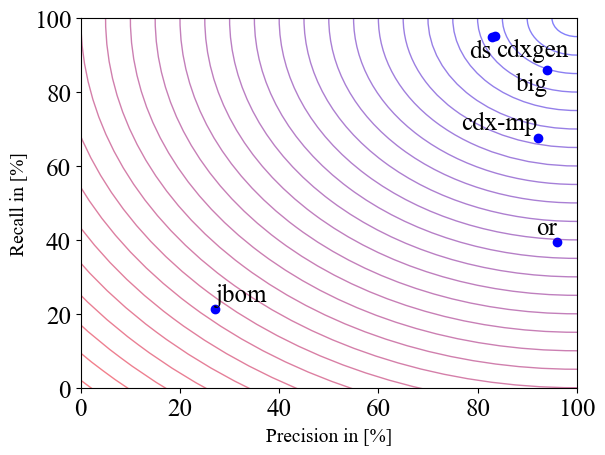

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap


rcParams.update({'font.size': 18})
rcParams['font.family'] = 'Times New Roman'
texts = []
data = pd.read_csv("./resultsTreeAverageWithoutFailures.csv")
text = ["cdxgen","ds","jbom","cdx-mp", "or","big"]
data.shape
data.head()
g1 = data
D_P = g1['P']
D_R = g1['R']
fig = plt.figure()
fig, ax1 = plt.subplots(1, sharex=True, sharey=True)
ax1.scatter(D_P,D_R, c='b')
plt.xlabel('Precision in [%]', fontsize=14)
plt.ylabel('Recall in [%]', fontsize=14)
plt.ylim([0, 100])
plt.xlim([0, 100])
# Loop for annotation of all points
for i in range(len(D_P)):
    texts.append(plt.text(D_P[i], D_R[i], text[i]))

colors = np.linspace(0, 1, 151)
cmap = LinearSegmentedColormap.from_list('gradient', ['blue', 'red'])

for i in range(0, 151, 5):

    circle = plt.Circle((100, 100), i, color=cmap(colors[i]), alpha= 0.5, fill=False)
    ax1.add_artist(circle)  


adjust_text(texts,# x=D_P+T_P, y=D_R+T_R, autoalign='x',
            #force_points=5,
            #force_text=True,
            )
plt.savefig("resultGraphic.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Generate Venn diagram from the actual results

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
import matplotlib.pyplot as plt
from itertools import product
from venn import venn
from supervenn import supervenn
# import the function list
rcParams.update({'font.size': 18})
rcParams['font.family'] = 'Times New Roman'

def annotate_regions(venn, titles=None, ax=None, **kwargs):
    ax = ax or plt.gca()
    titles = titles or list(map(''.join, product('01','01','01')))
    kwargs = kwargs or {'bbox': dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
                        'arrowprops': dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray')}

    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    for i in range(1,3):
        region = format(i, '#05b')[3:]
        print(region)
        label = v.get_label_by_id(region)
        if not label: continue
        ax.annotate(titles[i], 
                    xy=label.get_position() + np.array([0, 0.05]),
                    xytext=(xmax+0.1, ymax-i*0.15),
                    ha='left', textcoords='data',
                    **kwargs)
path = "./venn"
dirs = os.listdir(path)
# Get all sbom producers for every folder
for project in dirs:
    path = "./venn/" + project
    producers = os.listdir(path)
    truthPath = "./venn/" + project + "/truth.json"
    truth = pd.read_json(truthPath)
    truthList = []
    for idx,dependency in truth.iterrows():
        id = dependency['groupId'] + dependency['artifactId'] + dependency['version']
        truthList.append(id)
    map = {}
    producers = os.listdir(path)

    map['cdxgen'] = set([])
    map['depscan'] = set([])
    map['jbom'] = set([])
    map['cyclonedx-maven-plugin'] = set([])
    map['openrewrite'] = set([])
    map['build-info-go'] = set([])
    for producer in producers:
        if(producer == "truth.json"):
            continue
        path = "./venn/" + project + "/" + producer
        data = pd.read_json("./venn/" + project + "/" + producer)
        # get json array named truePositives
        # create a ID with groupID+artifactID+version for every object in truePositives
        lists = []
        for idx,dependency in data.iterrows():
            id = dependency['groupId'] + dependency['artifactId'] + dependency['version']
            lists.append(id)
        map[producer.removesuffix(".json")] = lists
    # create a venn diagram with the truth and every producer
    dataset_dict = {"truth": set(truthList),'cdxgen': set(map['cdxgen']), 'ds': set(map['depscan']), 'jbom': set(map['jbom']), 'cdx-mp': set(map['cyclonedx-maven-plugin']), 'or': set(map['openrewrite']), 'big': set(map['cdxgen'])}
    # create a venn diagram with the truth and every producer
    v = supervenn(list(dataset_dict.values()), list(dataset_dict.keys()))
    # fig, axis = venn.venn6(list(map.keys()), map.values())
    # venn it
    #annotate_regions(v, titles=['Truth', "correct",producer])
    ## create dir if not exists
    if not os.path.exists("./vennResults/" + project):
        os.makedirs("./vennResults/" + project)
        # get the position of the text from the venn diagram each region
    plt.title(project)
    plt.savefig("./vennResults/" + project + "/"+ "superven"+ ".pdf", format="pdf", bbox_inches="tight")
    plt.clf()
        # add the list to the map with the key of the producer name      
        # Get all sbom producers for every folder 

<Figure size 640x480 with 0 Axes>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
import matplotlib.pyplot as plt
from itertools import product
from venn import venn
from venn import pseudovenn
from venn import generate_petal_labels, draw_venn, generate_colors

# import the function list
rcParams.update({'font.size': 18})
rcParams['font.family'] = 'Times New Roman'

path = "./venn"
dirs = os.listdir(path)
# Get all sbom producers for every folder
for project in dirs:
    path = "./venn/" + project
    producers = os.listdir(path)
    truthPath = "./venn/" + project + "/truth.json"
    truth = pd.read_json(truthPath)
    truthList = []
    for idx,dependency in truth.iterrows():
        id = dependency['groupId'] + dependency['artifactId'] + dependency['version']
        truthList.append(id)
    map = {}
    producers = os.listdir(path)

    map['cdxgen'] = set([])
    map['depscan'] = set([])
    map['jbom'] = set([])
    map['cyclonedx-maven-plugin'] = set([])
    map['openrewrite'] = set([])
    map['build-info-go'] = set([])
    for producer in producers:
        if(producer == "truth.json"):
            continue
        path = "./venn/" + project + "/" + producer
        data = pd.read_json("./venn/" + project + "/" + producer)
        # get json array named truePositives
        # create a ID with groupID+artifactID+version for every object in truePositives
        lists = []
        for idx,dependency in data.iterrows():
            id = dependency['groupId'] + dependency['artifactId'] + dependency['version']
            lists.append(id)
        map[producer.removesuffix(".json")] = lists
    # create a venn diagram with the truth and every producer
    # dataset_dict = {"truth": set(truthList),'cdxgen': set(map['cdxgen']), 'ds': set(map['depscan']), 'jbom': set(map['jbom']), 'cdx-mp': set(map['cyclonedx-maven-plugin']), 'or': set(map['openrewrite']), 'big': set(map['cdxgen'])}
    dataset_dict = {'cdxgen': set(map['cdxgen']), 'ds': set(map['depscan']), 'jbom': set(map['jbom']), 'cdx-mp': set(map['cyclonedx-maven-plugin']), 'or': set(map['openrewrite']), 'big': set(map['cdxgen'])}

    # create a venn diagram with the truth and every producer
    v = venn(dataset_dict)
    # fig, axis = venn.venn6(list(map.keys()), map.values())
    # venn it
    #annotate_regions(v, titles=['Truth', "correct",producer])
    ## create dir if not exists
    if not os.path.exists("./vennResults/" + project):
        os.makedirs("./vennResults/" + project)
        # get the position of the text from the venn diagram each region
    plt.title(project)
    plt.savefig("./vennResults/" + project + "/"+ "venn6"+ ".pdf", format="pdf", bbox_inches="tight")
    plt.clf()

c:\Users\Administrator\scoop\apps\python\current\Lib\site-packages\venn\_venn.py:83: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = subplots(nrows=1, ncols=1, figsize=figsize)


<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>